# <center> ACCELEROMETER AND GYROSCOPE<center> BEHAVIOR PREDICTION
***
# Table of Contents
* [LOOK AT THE BIG PICTURE](#LOOK-AT-THE-BIG-PICTURE)
* [IMPORTS](#IMPORTS)
* [FUNCTIONS](#FUNCTIONS)
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [EXPLORATORY ANALYSIS](#EXPLORATORY-ANALYSIS)
* [DATA EDITING](#DATA-EDITING)
    * [Creating dummy variables (One-Hot Encode)](#Creating-dummy-variables-(One-Hot-Encode))
    * [Creating training and testing datasets](#Creating-training-and-testing-datasets)
***

## LOOK AT THE BIG PICTURE

* The problem consists of predicting bovine behavior with sensor accelerometer and gyroscope sensors data

## IMPORTS

In [199]:
import wandb

wandb.init(project="accelerometer_behavior_project")

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore')

## FUNCTIONS

In [201]:
def bar_plot_classes(target):
    import seaborn as sns
    target = pd.Series(target)

    behavior_counts = round(target.value_counts(normalize=True)*100, 2)

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=behavior_counts.keys(), y=behavior_counts.values)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.ylabel('Amount (%)')
    plt.show()

In [202]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## READING THE DATASET INTO PYTHON

In [203]:
df = pd.read_csv('novosDadosComComportamentos.csv')

# Change 'Cocho' behaivior samples to 'Pastejo'
df.Comportamento.replace(to_replace='Cocho', value='Pastejo', inplace=True)

# Remove 'Locomovendo', 'Agua', 'Outro' samples
df = df[df.Comportamento.isin(['Locomovendo', 'Agua', 'Outro']) == False]

# Drop rows with NaN values
df.dropna(inplace=True)

# Drop duplicated features with another scale
df.drop(labels=['ax', 'ay', 'az'], axis=1, inplace=True)

# Reset index
df.reset_index(inplace=True, drop=True)

## EXPLORATORY ANALYSIS

In [6]:
df.head()

,Date,gx,gy,gz,axc,ayc,azc,Comportamento
0,2022-11-20 08:55:44,5200,947,790,0.707275,-0.324463,0.886047,Ruminação
1,2022-11-20 08:55:46,65,-2168,-714,0.503662,-0.463440,0.624939,Ruminação
2,2022-11-20 08:55:47,-630,1433,365,0.231873,-0.229187,0.911072,Ruminação
3,2022-11-20 08:55:48,-2801,-3232,-1113,0.454041,-0.436218,0.720947,Ruminação
4,2022-11-20 08:55:49,4611,3331,1286,0.370605,-0.648010,0.627991,Ruminação


In [7]:
df.describe()

,gx,gy,gz,axc,ayc,azc
count,27546.000000,27546.000000,27546.000000,27546.000000,27546.000000,27546.000000
mean,305.292493,-164.169607,125.036811,0.432510,-0.125626,0.397463
std,4615.722417,3674.093010,4070.462185,0.490184,0.483062,0.399674
min,-32768.000000,-32768.000000,-32768.000000,-1.980591,-1.938965,-1.997864
25%,-844.000000,-1113.000000,-671.000000,0.236816,-0.542480,0.091980
50%,241.000000,-179.000000,133.000000,0.590637,-0.172119,0.408264
75%,1371.750000,749.750000,946.000000,0.770264,0.256775,0.737427
max,32767.000000,32767.000000,32767.000000,1.871216,1.973511,1.999268


In [90]:
sampleMeans = []
for _ in range(100000):
    samples = df['ayc'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)


In [93]:
np.array(sampleMeans).mean()

-0.12564915969238283

In [94]:
np.array(sampleMeans).std()

0.04816608860765341

<AxesSubplot:ylabel='Density'>

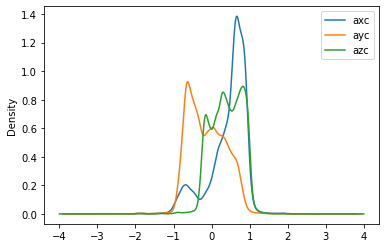

In [8]:
df[['axc', 'ayc', 'azc']].plot.density()

<AxesSubplot:ylabel='Density'>

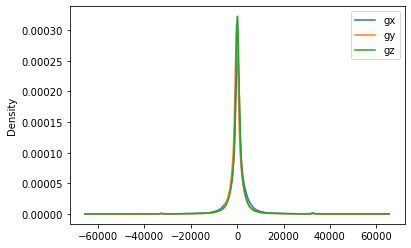

In [9]:
df[['gx', 'gy', 'gz']].plot.density()

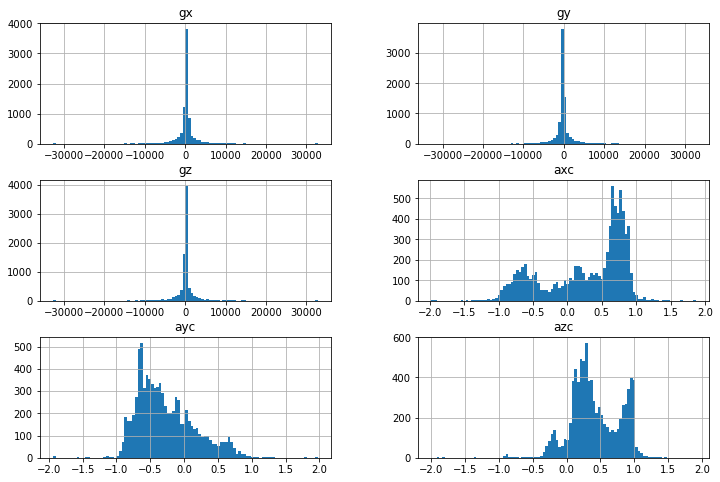

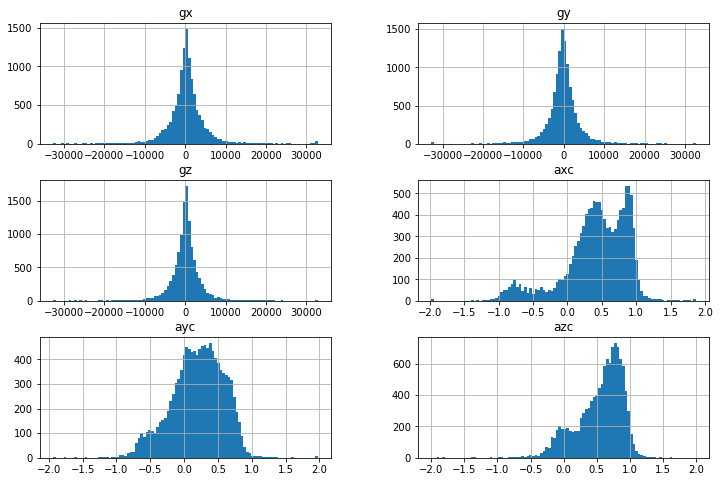

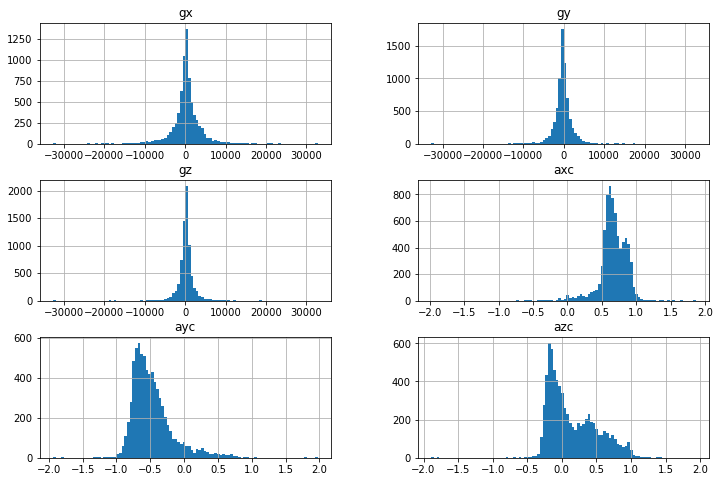

In [10]:
df.groupby('Comportamento').hist(bins=100, figsize=(12, 8))
plt.show()

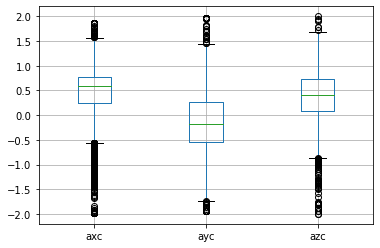

In [11]:
df.boxplot(column=['axc', 'ayc', 'azc'])
plt.show()

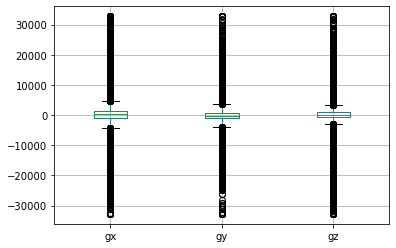

In [12]:
df.boxplot(column=['gx', 'gy', 'gz'])
plt.show()

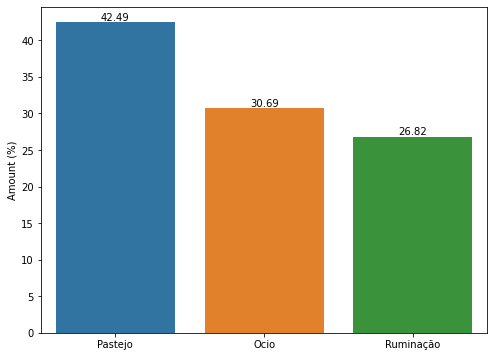

In [13]:
bar_plot_classes(df.Comportamento)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27546 entries, 0 to 28485
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           27546 non-null  object 
 1   gx             27546 non-null  int64  
 2   gy             27546 non-null  int64  
 3   gz             27546 non-null  int64  
 4   axc            27546 non-null  float64
 5   ayc            27546 non-null  float64
 6   azc            27546 non-null  float64
 7   Comportamento  27546 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 1.9+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Comportamentos = le.fit_transform(df['Comportamento'])

In [16]:
df['Comportamento'] = Comportamentos

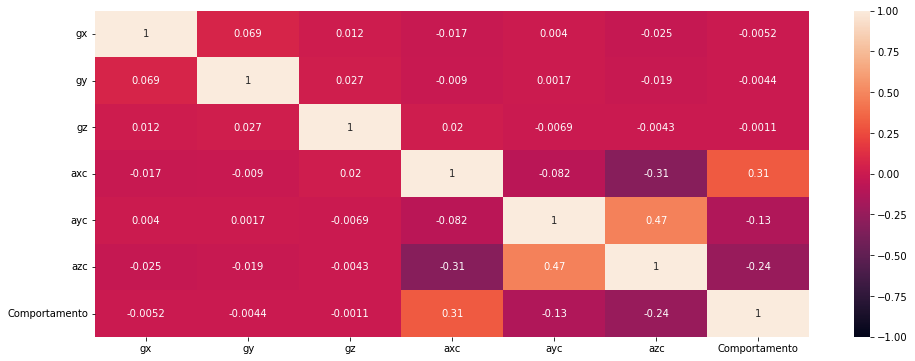

In [17]:
plt.figure(figsize=(16, 6))
sns.heatmap( df.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

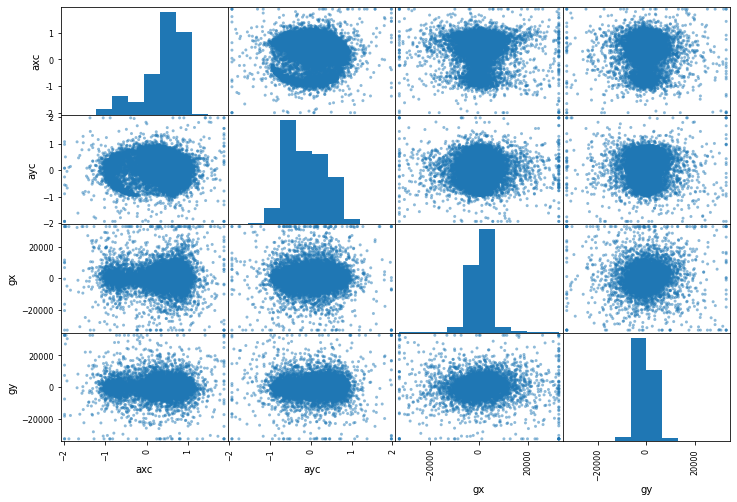

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["axc", "ayc", "gx", "gy"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

## PRE-PROCESSING

### Outliers treatment

In [35]:
print(f'Number of lines before pre-processing:', df.shape[0])

Number of lines before pre-processing: 27546


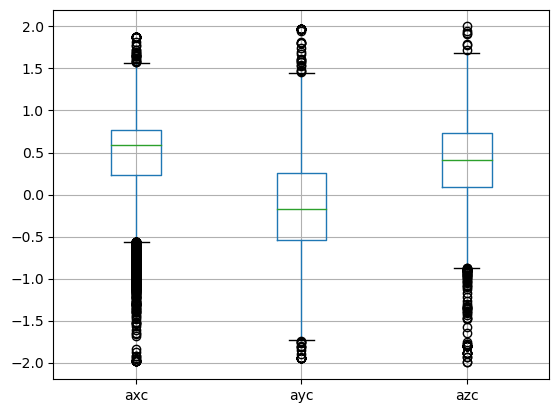

In [36]:
df.boxplot(column=['axc', 'ayc', 'azc'])
plt.show()

In [204]:
iqr =  df.quantile(q=0.75) - df.quantile(q=0.25)

lower_bonds = df.quantile(q=0.25) - 1.5*iqr

uper_bonds = df.quantile(q=0.75) + 1.5*iqr

for column in ['gx', 'gy', 'gz', 'axc', 'ayc', 'azc']:
    df = df[df[column] <= uper_bonds[column]]
    df = df[df[column] >= lower_bonds[column]]

df.reset_index(inplace=True, drop=True)

print(f'Number of lines after pre-processing:', df.shape[0])

Number of lines after pre-processing: 18017


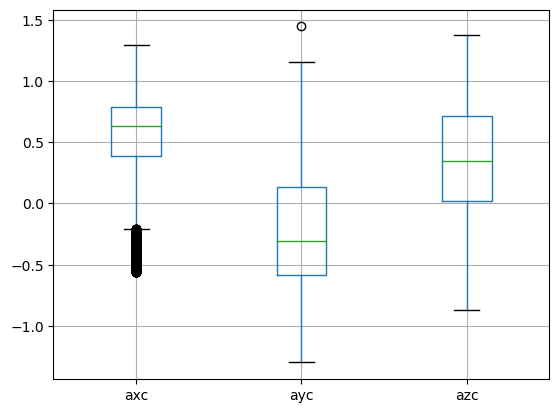

In [10]:
df.boxplot(column=['axc', 'ayc', 'azc'])
plt.show()

### Feature Engineering

In [205]:
# Creating SMA
df['sma'] = np.abs(df.axc.values) + np.abs(df.ayc.values) + np.abs(df.azc.values)

# Creating SVM
df['svm'] = np.sqrt(np.square(df.axc.values) + np.square(df.ayc.values) + np.square(df.azc.values))

# Creating Energy
df['energy'] = np.square(np.square(df.axc.values) + np.square(df.ayc.values) + np.square(df.azc.values))

# Creating Entropy
df['entropy'] = (1 + np.square(df.axc.values + df.ayc.values + df.azc.values)) + np.log(1 + np.square(df.axc.values + df.ayc.values + df.azc.values))

In [213]:
# Creating Movement variation
df['moveVar'] = 0
for i in range(df.shape[0] - 1):
    df.loc[i, 'moveVar'] = np.abs(df.axc[i + 1] - df.axc.iloc[i]) + np.abs(df.ayc.iloc[i + 1] - df.ayc.iloc[i]) + np.abs(df.azc.iloc[i + 1] - df.azc.iloc[i])
df.drop(df.tail(1).index,inplace=True)

In [214]:
df

,Date,gx,gy,gz,axc,ayc,azc,Comportamento,sma,svm,energy,entropy,moveVar
0,2022-11-20 08:55:46,65,-2168,-714,0.503662,-0.463440,0.624939,Ruminação,1.592041,0.926823,0.737882,1.808775,0.792175
1,2022-11-20 08:55:47,-630,1433,365,0.231873,-0.229187,0.911072,Ruminação,1.372131,0.967648,0.876739,2.441971,0.619324
2,2022-11-20 08:55:48,-2801,-3232,-1113,0.454041,-0.436218,0.720947,Ruminação,1.611206,0.957186,0.839430,1.981309,0.388184
3,2022-11-20 08:55:49,4611,3331,1286,0.370605,-0.648010,0.627991,Ruminação,1.646606,0.975519,0.905615,1.238834,0.482056
4,2022-11-20 08:55:50,-1916,-871,1949,0.560791,-0.578552,0.850403,Ruminação,1.989746,1.171492,1.883466,2.219967,0.882996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18011,2022-11-20 17:07:23,323,-297,51,0.149841,0.011536,0.976562,Ruminação,1.137939,0.988059,0.953083,3.125598,0.051147
18012,2022-11-20 17:07:24,245,-407,56,0.165833,0.025879,0.955750,Ruminação,1.147461,0.970375,0.886662,3.156796,0.066467
18013,2022-11-20 17:07:25,402,157,355,0.135254,0.027100,0.990417,Ruminação,1.152771,0.999977,0.999910,3.174269,0.047974
18014,2022-11-20 17:07:26,355,-169,103,0.153137,0.023987,0.963440,Ruminação,1.140564,0.975829,0.906767,3.134180,0.133057


## DATA DIVISION

In [215]:
y = df.Comportamento

x = df.drop(['Comportamento', 'Date'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True, random_state=0)

In [216]:
y_train.value_counts(normalize=True)*100

Pastejo      35.159141
Ocio         32.957069
Ruminação    31.883790
Name: Comportamento, dtype: float64

In [217]:
y_test.value_counts(normalize=True)*100

Pastejo      35.664447
Ocio         32.199493
Ruminação    32.136061
Name: Comportamento, dtype: float64

## MODEL SELECTION

In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

### Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline([('Scaler', MinMaxScaler()), ('model', RandomForestClassifier(random_state=0, n_jobs=-1))])
rf_scores = cross_val_score(rf_model, X_train, y_train,
                            scoring="accuracy", cv=10, n_jobs=-1)

In [220]:
display_scores(rf_scores*100)

Scores: [78.18853974 80.40665434 83.54898336 78.74306839 79.44444444 77.59259259
 78.88888889 80.55555556 79.07407407 79.81481481]
Mean: 79.62576162114055
Standard deviation: 1.5735459007934698


In [221]:
# Houldout
preds = rf_model.fit(X_train, y_train).predict(X_test)
probas = rf_model.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score

print(classification_report(y_test, preds))
print('Accuracy: ', accuracy_score(y_test, preds)*100)
print("Cohen's K: ", cohen_kappa_score(y_test, preds))

              precision    recall  f1-score   support

        Ocio       0.82      0.74      0.78      4061
     Pastejo       0.80      0.84      0.82      4498
   Ruminação       0.80      0.83      0.81      4053

    accuracy                           0.80     12612
   macro avg       0.80      0.80      0.80     12612
weighted avg       0.80      0.80      0.80     12612

Accuracy:  80.38376149698699
Cohen's K:  0.7051271163911834


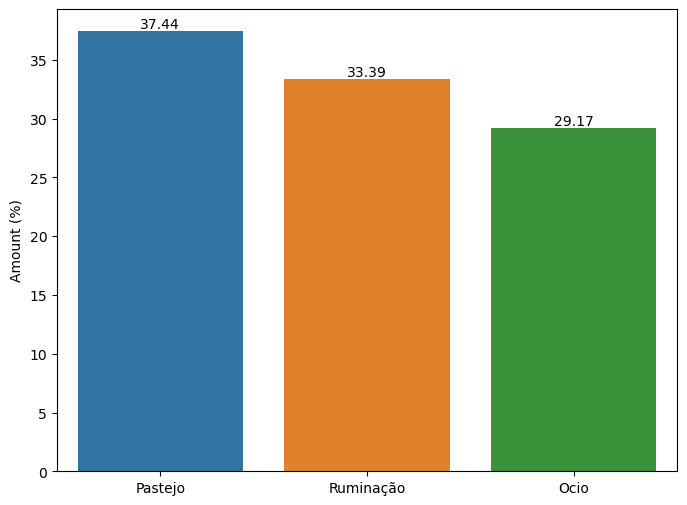

In [222]:
bar_plot_classes(preds)

### KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = Pipeline([('Scaler', MinMaxScaler()), ('model', KNeighborsClassifier(n_jobs=-1))])
knn_scores = cross_val_score(knn_model, X_train, y_train,
                            scoring="accuracy", cv=10, n_jobs=-1)

In [224]:
display_scores(knn_scores*100)

Scores: [75.60073937 78.00369686 80.96118299 74.86136784 79.25925926 75.
 77.77777778 77.96296296 77.22222222 77.77777778]
Mean: 77.44269870609983
Standard deviation: 1.8044678942897106


In [225]:
# Houldout
preds = knn_model.fit(X_train, y_train).predict(X_test)
probas = knn_model.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score

print(classification_report(y_test, preds))
print('Accuracy: ', accuracy_score(y_test, preds)*100)
print("Cohen's K: ", cohen_kappa_score(y_test, preds))

              precision    recall  f1-score   support

        Ocio       0.74      0.78      0.76      4061
     Pastejo       0.80      0.78      0.79      4498
   Ruminação       0.80      0.78      0.79      4053

    accuracy                           0.78     12612
   macro avg       0.78      0.78      0.78     12612
weighted avg       0.78      0.78      0.78     12612

Accuracy:  77.94957183634634
Cohen's K:  0.6690093189229498


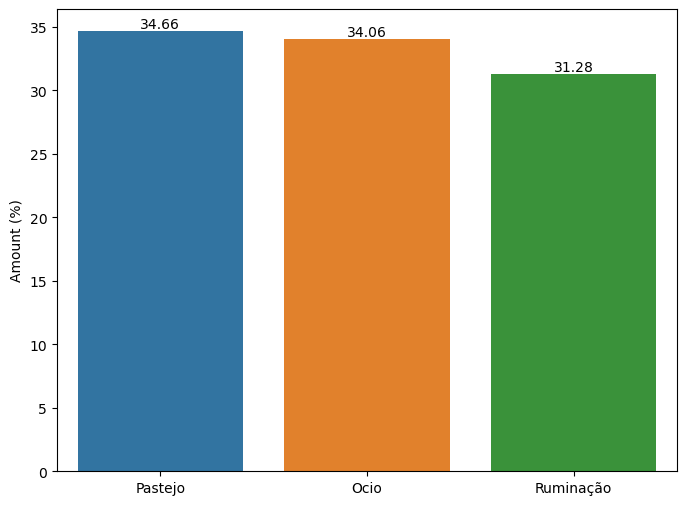

In [226]:
bar_plot_classes(preds)

## GYROSCOPE EVALUATION (DID WITHOUT PRE-PROCESSING)

### Only Gyroscope

In [252]:
df.columns

Index(['Date', 'ax', 'ay', 'az', 'gx', 'gy', 'gz ', 'axc', 'ayc', 'azc',
       'Comportamento'],
      dtype='object')

In [253]:
x = df[['gx', 'gy', 'gx']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True, random_state=0)

In [254]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline([('Scaler', MinMaxScaler()), ('model', RandomForestClassifier(random_state=0, n_jobs=-1))])
rf_scores = cross_val_score(rf_model, X_train, y_train,
                            scoring="accuracy", cv=10, n_jobs=-1)

In [255]:
display_scores(rf_scores*100)

Scores: [46.07013301 46.55380895 48.4885127  49.39467312 49.39467312 48.66828087
 48.42615012 48.66828087 48.42615012 47.33656174]
Mean: 48.14272246311678
Standard deviation: 1.0694664957730045


In [256]:
# Houldout
preds = rf_model.fit(X_train, y_train).predict(X_test)
probas = rf_model.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score

print(classification_report(y_test, preds))
print('Accuracy: ', accuracy_score(y_test, preds)*100)
print("Cohen's K: ", cohen_kappa_score(y_test, preds))

              precision    recall  f1-score   support

        Ocio       0.53      0.50      0.51      5969
     Pastejo       0.53      0.61      0.57      8223
   Ruminação       0.31      0.26      0.28      5091

    accuracy                           0.48     19283
   macro avg       0.46      0.46      0.46     19283
weighted avg       0.47      0.48      0.48     19283

Accuracy:  48.39495929056682
Cohen's K:  0.1978214562371765


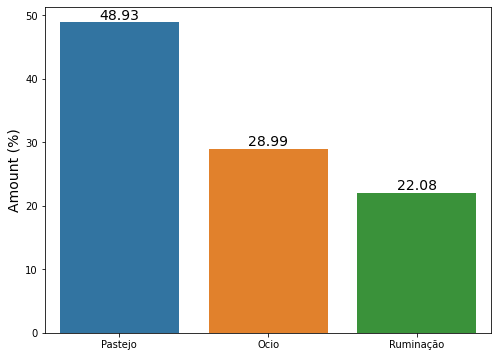

In [211]:
bar_plot_classes(preds)

### Only Accelerometer

In [257]:
x = df[['ax', 'ay', 'az', 'axc', 'ayc', 'azc']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True, random_state=0)

In [258]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline([('Scaler', MinMaxScaler()), ('model', RandomForestClassifier(random_state=0, n_jobs=-1))])
rf_scores = cross_val_score(rf_model, X_train, y_train,
                            scoring="accuracy", cv=10, n_jobs=-1)

In [259]:
display_scores(rf_scores*100)

Scores: [73.15598549 75.93712213 77.26723096 74.81840194 74.57627119 73.60774818
 73.97094431 72.88135593 76.51331719 73.36561743]
Mean: 74.609399474749
Standard deviation: 1.4336341435715076


In [260]:
# Houldout
preds = rf_model.fit(X_train, y_train).predict(X_test)
probas = rf_model.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score

print(classification_report(y_test, preds))
print('Accuracy: ', accuracy_score(y_test, preds)*100)
print("Cohen's K: ", cohen_kappa_score(y_test, preds))

              precision    recall  f1-score   support

        Ocio       0.71      0.62      0.67      5969
     Pastejo       0.75      0.82      0.78      8223
   Ruminação       0.74      0.75      0.74      5091

    accuracy                           0.74     19283
   macro avg       0.73      0.73      0.73     19283
weighted avg       0.74      0.74      0.74     19283

Accuracy:  73.8474303790904
Cohen's K:  0.5968600266235093


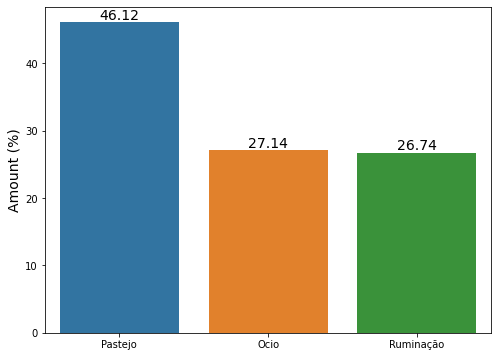

In [216]:
bar_plot_classes(preds)

## ALL BEHAVIORS EVALUATION (DID WITHOUT PRE-PROCESSING)

In [261]:
df = pd.read_csv('novosDadosComComportamentos.csv')

# Drop rows with NaN values
df.dropna(inplace=True)

In [262]:
y = df.Comportamento

x = df.drop(['Comportamento', 'Date'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True, random_state=0)

In [263]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline([('Scaler', MinMaxScaler()), ('model', RandomForestClassifier(random_state=0, n_jobs=-1))])
rf_scores = cross_val_score(rf_model, X_train, y_train,
                            scoring="accuracy", cv=10, n_jobs=-1)

In [264]:
display_scores(rf_scores*100)

Scores: [62.69005848 62.22222222 63.97660819 62.45614035 60.23391813 65.22248244
 64.16861827 62.17798595 63.58313817 63.58313817]
Mean: 63.03143103660791
Standard deviation: 1.3134984923812125


In [265]:
# Houldout
preds = rf_model.fit(X_train, y_train).predict(X_test)
probas = rf_model.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score

print(classification_report(y_test, preds))
print('Accuracy: ', accuracy_score(y_test, preds)*100)
print("Cohen's K: ", cohen_kappa_score(y_test, preds))

              precision    recall  f1-score   support

        Agua       0.39      0.11      0.18       230
       Cocho       0.46      0.43      0.44      3609
 Locomovendo       0.09      0.01      0.01       180
        Ocio       0.73      0.69      0.71      5964
       Outro       0.30      0.05      0.09       221
     Pastejo       0.53      0.62      0.57      4612
   Ruminação       0.75      0.80      0.77      5125

    accuracy                           0.63     19941
   macro avg       0.46      0.39      0.40     19941
weighted avg       0.63      0.63      0.63     19941

Accuracy:  63.3970212125771
Cohen's K:  0.5134553699386768


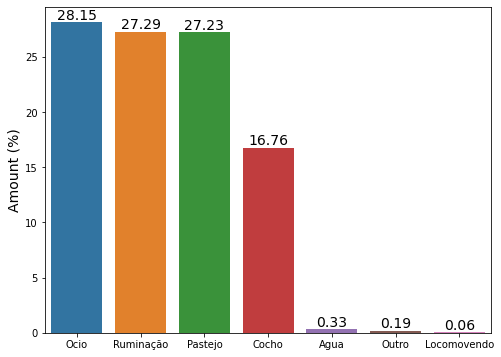

In [266]:
bar_plot_classes(preds)

In [267]:
real_vs_preds = pd.DataFrame({'Behavior': y_test, 'Predictions': preds})

In [268]:
for behavior in real_vs_preds.Behavior.unique():
    print(real_vs_preds[real_vs_preds.Behavior == behavior].value_counts(normalize=True)*100)
    print()

Behavior  Predictions
Ocio      Ocio           68.896714
          Pastejo        12.407780
          Ruminação      10.647217
          Cocho           7.461435
          Agua            0.352113
          Outro           0.201207
          Locomovendo     0.033535
dtype: float64

Behavior   Predictions
Ruminação  Ruminação      79.746341
           Ocio            8.819512
           Pastejo         6.712195
           Cocho           4.682927
           Agua            0.019512
           Locomovendo     0.019512
dtype: float64

Behavior  Predictions
Pastejo   Pastejo        62.250650
          Cocho          21.964441
          Ocio            8.954900
          Ruminação       6.287944
          Agua            0.238508
          Outro           0.195143
          Locomovendo     0.108413
dtype: float64

Behavior  Predictions
Agua      Ocio           29.130435
          Cocho          24.782609
          Pastejo        24.347826
          Agua           11.304348
          Ruminaç

===== Ocio: Distribution of how it was classified =====


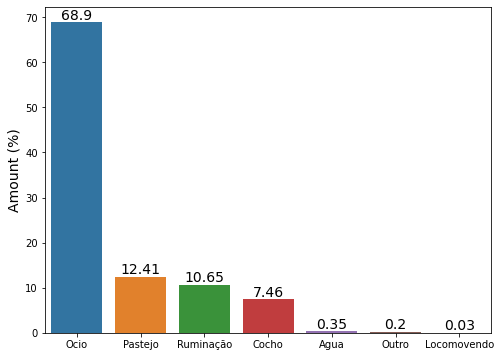

===== Ruminação: Distribution of how it was classified =====


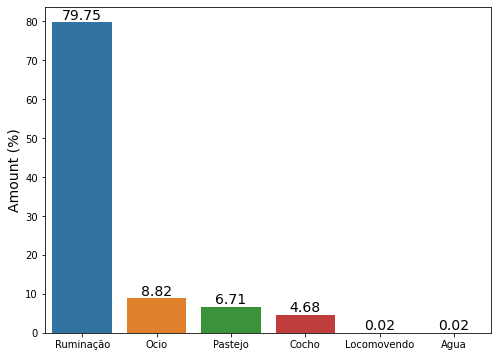

===== Pastejo: Distribution of how it was classified =====


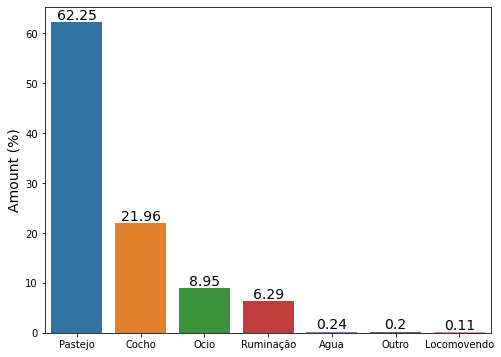

===== Agua: Distribution of how it was classified =====


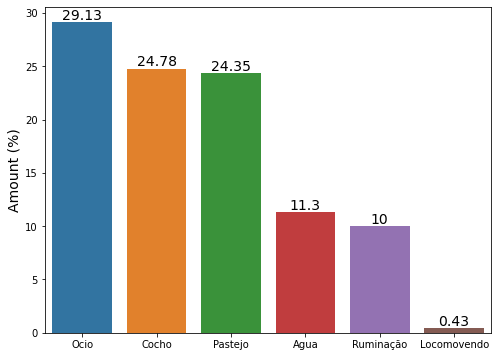

===== Cocho: Distribution of how it was classified =====


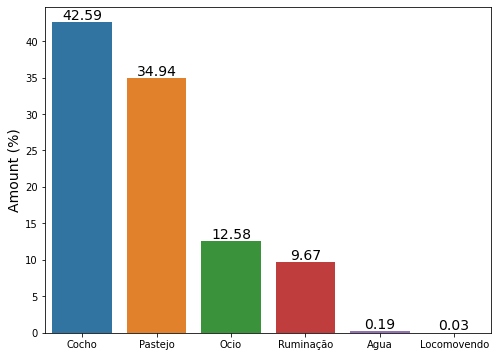

===== Locomovendo: Distribution of how it was classified =====


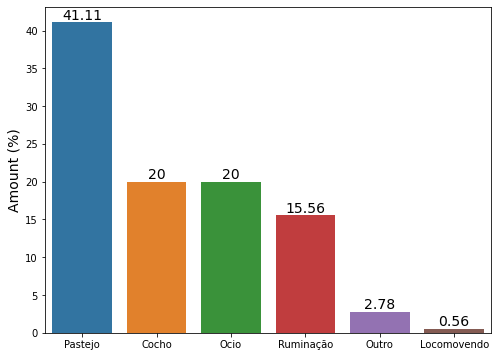

===== Outro: Distribution of how it was classified =====


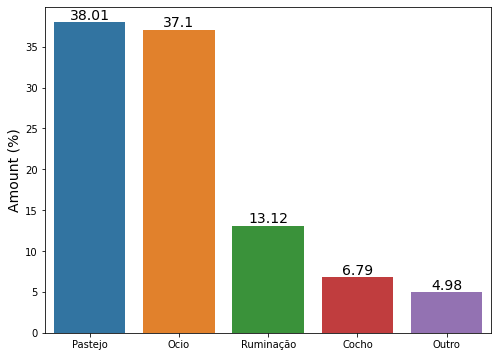

In [269]:
for behavior in real_vs_preds.Behavior.unique():
    print(5*'=' + " " + behavior + ": Distribution of how it was classified " + 5*'=')
    bar_plot_classes(real_vs_preds[real_vs_preds.Behavior == behavior].Predictions)

##  HYPERPARAMETERS SEARCH

### RF

In [ ]:
wandb.sklearn.plot_classifier(rf_model, X_train, X_test, y_train, y_test, preds, probas, labels=y_test.value_counts().keys().to_list(), model_name="Random Forest", feature_names=None)

In [81]:
from sklearn.model_selection import cross_val_score

In [92]:
def tune_rf(params):
    from sklearn.model_selection import cross_val_score
    bootstrap = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    n_estimators = params[4]
    
    print(params, '\n')
    
    rf_model = RandomForestClassifier(bootstrap=bootstrap, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                     min_samples_split=min_samples_split,n_estimators=n_estimators, random_state=0, n_jobs=-1)
    

    r2 = cross_val_score(rf_model, X_train, y_train, cv=5)
    
    return -r2.mean()

space = [
    [True, False], #bootstrap
    [10, 20, 30, None], #max_depth
    [1, 2, 4], # min_samples_leaf
    [2, 5, 10], # min_samples_split
    [5, 10, 20, 50, 100, 200, 300]] # n_estimators

In [93]:
%%time
from skopt import gp_minimize
rf_best_params = gp_minimize(tune_rf, space, random_state=0, verbose=True, n_calls=100, n_random_starts=20, n_jobs=-1)

Iteration No: 1 started. Evaluating function at random point.
[True, None, 4, 10, 100] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.2405
Function value obtained: -0.6362
Current minimum: -0.6362
Iteration No: 2 started. Evaluating function at random point.
[False, 20, 1, 5, 50] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.2545
Function value obtained: -0.6209
Current minimum: -0.6362
Iteration No: 3 started. Evaluating function at random point.
[True, 20, 2, 10, 20] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4533
Function value obtained: -0.6303
Current minimum: -0.6362
Iteration No: 4 started. Evaluating function at random point.
[True, 20, 4, 2, 200] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.8160
Function value obtained: -0.6332
Current minimum: -0.6362
Iteration No: 5 started. Evaluating function at random point.
[False, 30, 2, 5, 100] 

Iteration No: 5 ended. Evaluation 

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.7059
Function value obtained: -0.6352
Current minimum: -0.6362
Iteration No: 44 started. Searching for the next optimal point.
[True, None, 4, 2, 100] 

Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 2.2601
Function value obtained: -0.6335
Current minimum: -0.6362
Iteration No: 45 started. Searching for the next optimal point.
[False, None, 4, 5, 300] 

Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 6.9794
Function value obtained: -0.6308
Current minimum: -0.6362
Iteration No: 46 started. Searching for the next optimal point.
[True, 20, 4, 2, 300] 

Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 4.8575
Function value obtained: -0.6332
Current minimum: -0.6362
Iteration No: 47 started. Searching for the next optimal point.
[True, 10, 2, 10, 50] 

Iteration No: 47 ended. Search finished for the next optimal po

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 2.1831
Function value obtained: -0.6348
Current minimum: -0.6363
Iteration No: 52 started. Searching for the next optimal point.
[True, None, 2, 10, 10] 

Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 0.9613
Function value obtained: -0.6151
Current minimum: -0.6363
Iteration No: 53 started. Searching for the next optimal point.
[False, 20, 4, 10, 5] 

Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 0.9381
Function value obtained: -0.6104
Current minimum: -0.6363
Iteration No: 54 started. Searching for the next optimal point.
[False, 20, 4, 10, 300] 

Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 6.6546
Function value obtained: -0.6329
Current minimum: -0.6363
Iteration No: 55 started. Searching for the next optimal point.
[True, None, 2, 2, 50] 

Iteration No: 55 ended. Search finished for the next optimal po

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 2.2439
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 72 started. Searching for the next optimal point.
[False, 30, 2, 5, 50] 

Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 2.0964
Function value obtained: -0.6212
Current minimum: -0.6363
Iteration No: 73 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 2.3266
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 74 started. Searching for the next optimal point.
[False, 20, 4, 2, 100] 

Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 2.9707
Function value obtained: -0.6309
Current minimum: -0.6363
Iteration No: 75 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 2.3248
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 76 started. Searching for the next optimal point.
[False, 10, 4, 10, 10] 

Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 1.1521
Function value obtained: -0.6129
Current minimum: -0.6363
Iteration No: 77 started. Searching for the next optimal point.
[True, 30, 4, 10, 20] 

Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 1.2445
Function value obtained: -0.6277
Current minimum: -0.6363
Iteration No: 78 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 2.3336
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 79 started. Searching for the next optimal point.
[False, None, 2, 2, 5] 

Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 1.0987
Function value obtained: -0.5972
Current minimum: -0.6363
Iteration No: 80 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 2.3718
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 81 started. Searching for the next optimal point.
[True, None, 4, 5, 10] 

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 1.1369
Function value obtained: -0.6213
Current minimum: -0.6363
Iteration No: 82 started. Searching for the next optimal point.
[False, 10, 2, 2, 300] 

Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 5.8981
Function value obtained: -0.6226
Current minimum: -0.6363
Iteration No: 83 started. Searching for the next optimal point.
[True, 30, 2, 10, 200] 

Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 3.7932
Function value obtained: -0.6338
Current minimum: -0.6363
Iteration No: 84 started. Searching for the next optimal point.
[True, None, 2, 10, 300] 

Iteration No: 84 ended. Search finished for the next optimal p

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 2.4288
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 87 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 2.4295
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 88 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 2.4267
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 89 started. Searching for the next optimal point.
[True, None, 2, 10, 100] 

Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 2.4918
Function value obtained: -0.6325
Current minimum: -0.6363
Iteration No: 90 started. Searching for the next optimal point.
[False, 20, 1, 5, 100] 

Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 3.3360
Function value obtained: -0.6199
Current minimum: -0.6363
Iteration No: 91 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 2.9096
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 92 started. Searching for the next optimal point.
[True, 20, 1, 2, 50] 

Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 2.0239
Function value obtained: -0.6272
Current minimum: -0.6363
Iteration No: 93 started. Searching for the next optimal point.
[True, 30, 1, 5, 300] 

Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 5.6701
Function value obtained: -0.6344
Current minimum: -0.6363
Iteration No: 94 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 2.5996
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 95 started. Searching for the next optimal point.
[True, 30, 2, 2, 20] 

Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 1.5109
Function value obtained: -0.6208
Current minimum: -0.6363
Iteration No: 96 started. Searching for the next optimal point.
[True, 30, 4, 2, 10] 

Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 1.3614
Function value obtained: -0.6213
Current minimum: -0.6363
Iteration No: 97 started. Searching for the next optimal point.
[True, None, 1, 5, 300] 

Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 5.6835
Function value obtained: -0.6338
Current minimum: -0.6363
Iteration No: 98 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 2.5780
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 99 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 2.6043
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 100 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 2.6101
Function value obtained: -0.6363
Current minimum: -0.6363
CPU times: user 3min 8s, sys: 3min 18s, total: 6min 27s
Wall time: 4min 42s


In [94]:
rf_best_params.x

[True, 30, 4, 10, 100]